In [ ]:
import pandas as pd
import numpy as np
import statistics as stat
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/DATASET/diamondsgg.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
df.loc[3]

carat         0.29
cut        Premium
color            I
clarity        VS2
depth         62.4
table         58.0
price          334
x              4.2
y             4.23
z             2.63
Name: 3, dtype: object

In [ ]:
df.loc[0:5]

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [ ]:
df.loc[0:5,['cut','color']]

,cut,color
0,Ideal,E
1,Premium,E
2,Good,E
3,Premium,I
4,Good,J
5,Very Good,J


In [ ]:
df.iloc[0:4,0:3]

,carat,cut,color
0,0.23,Ideal,E
1,0.21,Premium,E
2,0.23,Good,E
3,0.29,Premium,I


In [ ]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53928 non-null  object 
 4   depth    53933 non-null  float64
 5   table    53932 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53930 non-null  float64
 8   y        53936 non-null  float64
 9   z        53924 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [ ]:
max(df.price)

18823

In [ ]:
min(df.price)

326

In [ ]:
pd.unique(df.cut)

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
data = df.cut.value_counts()
data

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53933.000000,53932.000000,53940.000000,53930.000000,53936.000000,53924.000000
mean,0.797940,61.749510,57.457263,3932.799722,5.731166,5.734510,3.538754
std,0.474011,1.432641,2.234505,3989.439738,1.121836,1.142109,0.705741
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
stat.mean(df['price'])

3932.799721913237

In [ ]:
stat.median(df['price'])

2401.0

In [ ]:
#Standard Deviations
np.std(df['price'])


3989.4027576288736

In [ ]:
np.percentile(df['price'], 50)

2401.0

In [ ]:
df['price'].quantile([0.05,0.25,0.5,0.75])

0.05     544.00
0.25     950.00
0.50    2401.00
0.75    5324.25
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


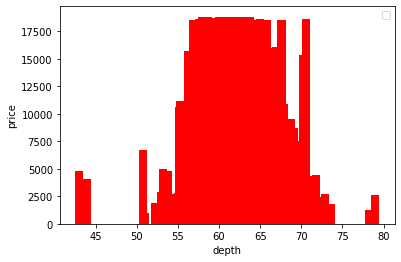

In [ ]:
d = df.depth
p = df.price


plt.xlabel('depth')
plt.ylabel('price')
plt.bar(d,p,color='red',width=1)


plt.legend()

In [ ]:
### Missing Value handle
df.isnull().sum()

carat       0
cut         0
color       0
clarity    12
depth       7
table       8
price       0
x          10
y           4
z          16
dtype: int64

In [ ]:
(df.isnull().sum() / len(df))*100

carat      0.000000
cut        0.000000
color      0.000000
clarity    0.022247
depth      0.012977
table      0.014831
price      0.000000
x          0.018539
y          0.007416
z          0.029663
dtype: float64

In [ ]:
df.clarity=df.clarity.fillna(df.clarity.mode()[0])

In [ ]:
df.depth=df.depth.fillna(df.depth.mean())

In [ ]:
df.table=df.table.fillna(df.table.mean())

In [ ]:
df.x=df.x.fillna(df.x.mean())

In [ ]:
df.y=df.y.fillna(df.y.mean())

In [ ]:
df.z=df.z.fillna(df.z.mean())

In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#### label encoding
#from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df.cut=lb.fit_transform(df.cut)

In [ ]:
df.color=lb.fit_transform(df.color)

In [ ]:
df.clarity=lb.fit_transform(df.color)

In [ ]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,0,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,0,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,0,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,4,61.0,58.0,2757,6.15,6.12,3.74


Classification Part

In [ ]:
### droping prediction class
x = df.drop('price',axis=1)
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,1,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,1,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,1,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,6,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,0,60.8,57.0,5.75,5.76,3.50
53936,0.72,1,0,0,63.1,55.0,5.69,5.75,3.61
53937,0.70,4,0,0,62.8,60.0,5.66,5.68,3.56
53938,0.86,3,4,4,61.0,58.0,6.15,6.12,3.74


In [ ]:
y = df.price

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
y_test

50263     2237
41552     1236
29329      698
22227    10283
27971      658
         ...  
36087      926
7712       579
37587      990
9815      4670
16637     6653
Name: price, Length: 10788, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lrg = LinearRegression()

lrg.fit(x_train,y_train)

lrg.score(x_train,y_train)*100

87.08856727658791

In [ ]:
lrg.score(x_test,y_test)*100

86.9005916400066

In [ ]:
y_pred_lrg=lrg.predict(x_test)

In [ ]:
y_pred_lrg

array([ 2129.5091342 ,  1325.11342618,  -213.6267376 , ...,
         819.37329219,  5936.38961093, 15429.82744123])

In [ ]:
y_test

50263     2237
41552     1236
29329      698
22227    10283
27971      658
         ...  
36087      926
7712       579
37587      990
9815      4670
16637     6653
Name: price, Length: 10788, dtype: int64

In [ ]:
##### Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
lgrg = LogisticRegression()

lgrg.fit(x_train,y_train)

y_train_prediction = lgrg.predict(x_train)

In [ ]:
training_data_accuracy = accuracy_score(y_train_prediction, y_train)
print('Accuracy on Training data : ', training_data_accuracy*100)

In [ ]:
y_test_prediction = lgrg.predict(x_test)
testing_data_accuracy = accuracy_score(y_test_prediction, y_test)
print('Accuracy on Testing data : ', testing_data_accuracy*100)

In [ ]:
y_test_prediction

In [ ]:
y_test

In [ ]:
y_pred=lgrg.predict(x_test)

print(classification_report(y_test,y_pred))